In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 불러오기
mbti = pd.read_csv('/content/drive/MyDrive/BOAZ분석/Colab Notebooks/MBTI 500.csv')
mbti.head()

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ


In [3]:
mbti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106067 entries, 0 to 106066
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   106067 non-null  object
 1   type    106067 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


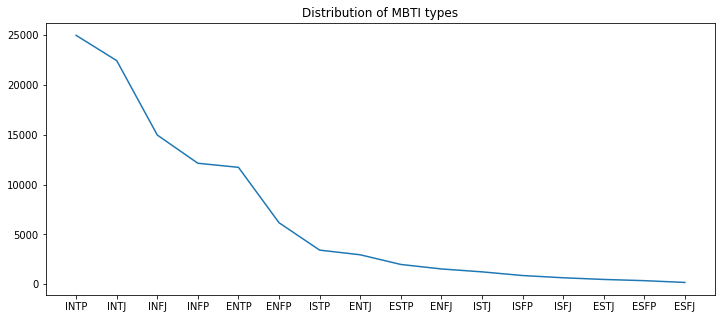

In [4]:
# MBTI별 개수 분포도
plt.figure(figsize=(12, 5))
plt.plot(mbti['type'].value_counts())
plt.title('Distribution of MBTI types')
plt.show()

In [5]:
# 데이터가 커서 sampling
df = mbti.sample(frac=0.1, random_state=42)
df

,posts,type
28447,reddit gain lot popularity use type people peo...,INTP
4975,follow second quote definitely emotional respo...,INTJ
46168,last thing need start get involve guess choice...,INTP
15894,difficu make distinction spawn effectively som...,INTJ
12382,think reasonable assumption consider differenc...,INTJ
...,...,...
29635,become le self absorb asshole nice dick mean s...,INTP
101807,time think assertive introspective people hate...,INFP
31466,mean could efficient enfps like infps interest...,INTP
75641,story turn say honest say something mean say e...,ENTP


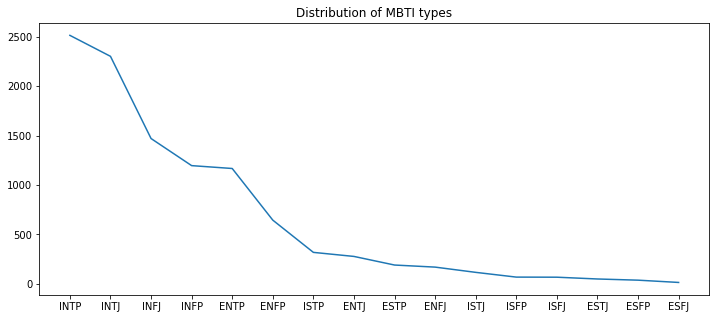

In [6]:
# 샘플링한 데이터의 MBTI별 개수 분포도
plt.figure(figsize=(12, 5))
plt.plot(df['type'].value_counts())
plt.title('Distribution of MBTI types')
plt.show()

In [7]:
# 불용어 처리

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words2 = ['intp', 'intj', 'infj', 'infp', 'entp', 'istp', 'entj', 'estp',
               'enfj', 'estp', 'enfj', 'istj', 'isfp', 'isfj', 'estj', 'esfp', 'esfj']

# 기본 불용어 제거
df['posts_without_stopwords'] = df['posts'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
# mbti가 직접적으로 제시되어 있을 경우 제거
df['posts_without_stopwords'] = df['posts_without_stopwords'].apply(lambda x: ' '.join([word2 for word2 in x.split() if word2 not in (stop_words2)]))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,posts,type,posts_without_stopwords
28447,reddit gain lot popularity use type people peo...,INTP,reddit gain lot popularity use type people peo...
4975,follow second quote definitely emotional respo...,INTJ,follow second quote definitely emotional respo...
46168,last thing need start get involve guess choice...,INTP,last thing need start get involve guess choice...
15894,difficu make distinction spawn effectively som...,INTJ,difficu make distinction spawn effectively som...
12382,think reasonable assumption consider differenc...,INTJ,think reasonable assumption consider differenc...
...,...,...,...
29635,become le self absorb asshole nice dick mean s...,INTP,become le self absorb asshole nice dick mean s...
101807,time think assertive introspective people hate...,INFP,time think assertive introspective people hate...
31466,mean could efficient enfps like infps interest...,INTP,mean could efficient enfps like infps interest...
75641,story turn say honest say something mean say e...,ENTP,story turn say honest say something mean say e...


In [8]:
# TOKENIZE -> STEMMING (SnowballStemmer)

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import text_to_word_sequence

import pandas as pd
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

df['tokenized'] = df.apply(lambda row: text_to_word_sequence(row['posts_without_stopwords']), axis=1)                 # (1) TOKENIZE
df['stemmed'] = df['tokenized'].apply(lambda x: [stemmer.stem(y) for y in x])                                         # (2) STEMMING
df['posts_without_stopwords'] = df['tokenized'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))        # (3) 단어 길이가 2 이하일 경우 제거
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,posts,type,posts_without_stopwords,tokenized,stemmed
28447,reddit gain lot popularity use type people peo...,INTP,reddit gain lot popularity use type people peo...,"[reddit, gain, lot, popularity, use, type, peo...","[reddit, gain, lot, popular, use, type, peopl,..."
4975,follow second quote definitely emotional respo...,INTJ,follow second quote definitely emotional respo...,"[follow, second, quote, definitely, emotional,...","[follow, second, quot, definit, emot, respons,..."
46168,last thing need start get involve guess choice...,INTP,last thing need start get involve guess choice...,"[last, thing, need, start, get, involve, guess...","[last, thing, need, start, get, involv, guess,..."
15894,difficu make distinction spawn effectively som...,INTJ,difficu make distinction spawn effectively som...,"[difficu, make, distinction, spawn, effectivel...","[difficu, make, distinct, spawn, effect, someo..."
12382,think reasonable assumption consider differenc...,INTJ,think reasonable assumption consider differenc...,"[think, reasonable, assumption, consider, diff...","[think, reason, assumpt, consid, differ, subje..."


In [9]:
# 단어 빈도수 확인
df.posts_without_stopwords.str.split(expand=True).stack().value_counts()

like           69708
think          59216
people         55443
get            53189
make           40885
               ...  
softhearted        1
animegirl          1
hosh               1
senstive           1
phenoix            1
Length: 71200, dtype: int64

In [10]:
## 빈도수 시도1

# df["tokenized"] = df["tokenized"].apply(set)
# df.groupby("type").apply(lambda x: set.union(*x.tokenized))

# group_df = df.groupby("type").apply(lambda x: set.union(*x.tokenized))
# for tup in group_df.to_frame().itertuples():
#   tup1_str = ", ".join(sorted(tup[1]))
#   n = len(tup[1])
#   print(f"{tup[0]}: {tup1_str} ({n}개)")

In [11]:
# 빈도수 시도2 (시도1 실행시키면 X)
df.groupby("type").tokenized.sum()

type
ENFJ    [set, thing, wish, hobby, like, one, friend, a...
ENFP    [sub, could, tell, se, te, perfectly, distingu...
ENTJ    [point, like, ive, enough, really, know, want,...
ENTP    [might, go, bite, top, try, make, point, know,...
ESFJ    [lot, friend, stand, next, talk, say, get, fck...
ESFP    [win, round, one, master, debater, course, win...
ESTJ    [anyway, quick, edit, thought, suicide, please...
ESTP    [actor, try, get, power, competence, process, ...
INFJ    [would, like, crush, doll, experience, think, ...
INFP    [think, expect, people, overly, bubbly, anythi...
INTJ    [follow, second, quote, definitely, emotional,...
INTP    [reddit, gain, lot, popularity, use, type, peo...
ISFJ    [time, sub, one, ever, able, explain, love, so...
ISFP    [introduce, mean, function, fe, lunch, lot, fr...
ISTJ    [introvert, internet, yes, time, think, want, ...
ISTP    [satisfy, get, song, right, usually, music, me...
Name: tokenized, dtype: object

In [12]:
## 빈도수 시도2-1

# from collections import Counter
# for c, l in df.itertuples():
#   print(Counter(l))

In [13]:
# 빈도수 시도 3

tok = df['posts_without_stopwords']

freq = {}
for w in (tok):
  freq[w] = freq.get(w,0) + 1

print(freq)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [14]:
# 빈도수 시도 3-1

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()
tf = vector.fit_transform(tok)

print(tf)

  (0, 51287)	2
  (0, 23864)	1
  (0, 36495)	2
  (0, 48169)	1
  (0, 66515)	2
  (0, 64467)	12
  (0, 46487)	6
  (0, 59854)	1
  (0, 59845)	1
  (0, 35762)	1
  (0, 31520)	3
  (0, 31548)	4
  (0, 9975)	1
  (0, 25545)	1
  (0, 56110)	2
  (0, 20774)	2
  (0, 55275)	2
  (0, 35193)	1
  (0, 48807)	3
  (0, 38345)	3
  (0, 50956)	4
  (0, 11373)	2
  (0, 611)	1
  (0, 62360)	9
  (0, 55301)	1
  :	:
  (10606, 38377)	1
  (10606, 47434)	1
  (10606, 13594)	1
  (10606, 49183)	1
  (10606, 42358)	1
  (10606, 54238)	1
  (10606, 17100)	1
  (10606, 5674)	1
  (10606, 31041)	3
  (10606, 31122)	1
  (10606, 20383)	1
  (10606, 9059)	1
  (10606, 70010)	1
  (10606, 44103)	1
  (10606, 8992)	1
  (10606, 29051)	1
  (10606, 31941)	1
  (10606, 69952)	2
  (10606, 54864)	1
  (10606, 31009)	1
  (10606, 26434)	1
  (10606, 49778)	1
  (10606, 44872)	1
  (10606, 6938)	1
  (10606, 47034)	1


In [15]:
# 각 단어의 인덱스가 어떻게 부여되었는지 보여주기 위해 단어 입력

print(vector.vocabulary_['love'])

36540


In [16]:
## 번외

from gensim.models import Word2Vec
model = Word2Vec(sentences=df['tokenized'], size=100, window=2, min_count=5, workers=10, sg=1)

a = model.wv.most_similar("love")
a

[('adore', 0.7625307440757751),
 ('wonderful', 0.7138980627059937),
 ('dearly', 0.6820360422134399),
 ('unrequited', 0.6804951429367065),
 ('hate', 0.6746355295181274),
 ('enamor', 0.6644003391265869),
 ('unconditionally', 0.6638984084129333),
 ('awesome', 0.6632622480392456),
 ('madly', 0.6592704653739929),
 ('amaze', 0.6516716480255127)]